In [11]:
import importlib
import json
import os
from collections import defaultdict
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from plot_utils import TASK_TO_LABEL_MAPPING
from plot_utils import v2_colors as COLORS

from fusion_bench.constants import PROJECT_ROOT_PATH
from fusion_bench.utils.json import load_from_json

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

Generate the csv file by running:

```bash
fusion_bench \
    path.log_dir="outputs/ViT-B-32/smile_upscaling/projected_energy_analysis" \
    method=smile_upscaling/projected_energy \
    modelpool=CLIPVisionModelPool/clip-vit-base-patch32_TA8_model_only
```

In [12]:
data = pd.read_csv(
    PROJECT_ROOT_PATH
    / "outputs/ViT-B-32/smile_upscaling/projected_energy_analysis"
    / "projected_energy_analysis.csv"
)
data

,Unnamed: 0,model_name,module_index,module_name,projected_energy_I,projected_energy_II,projected_energy_II_III
0,0,sun397,0,vision_model.encoder.layers.0.self_attn.k_proj,0.151945,0.352063,0.352063
1,1,sun397,1,vision_model.encoder.layers.0.self_attn.v_proj,0.180019,0.341393,0.341393
2,2,sun397,2,vision_model.encoder.layers.0.self_attn.q_proj,0.097182,0.459437,0.459437
3,3,sun397,3,vision_model.encoder.layers.0.self_attn.out_proj,0.156565,0.364185,0.364185
4,4,sun397,4,vision_model.encoder.layers.0.mlp.fc1,0.175304,0.113598,0.294184
...,...,...,...,...,...,...,...
571,571,dtd,67,vision_model.encoder.layers.11.self_attn.v_proj,0.097586,0.452547,0.452547
572,572,dtd,68,vision_model.encoder.layers.11.self_attn.q_proj,0.074421,0.528087,0.528087
573,573,dtd,69,vision_model.encoder.layers.11.self_attn.out_proj,0.148032,0.379288,0.379288
574,574,dtd,70,vision_model.encoder.layers.11.mlp.fc1,0.035656,0.097316,0.562890


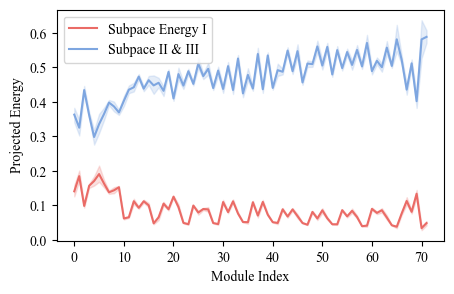

In [28]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(
    data=data,
    x="module_index",
    y="projected_energy_I",
    label="Subpace Energy I",
    c="#EA6B66",
    ax=ax,
)
sns.lineplot(
    data=data,
    x="module_index",
    y="projected_energy_II_III",
    label="Subpace II & III",
    c="#7EA6E0",
    ax=ax,
)

ax.set_xlabel("Module Index")
ax.set_ylabel("Projected Energy")
plt.legend(loc="upper left")

plt.savefig("projected_energy_analysis.pdf", bbox_inches="tight")
plt.show()